In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import string
from PyPDF2 import PdfReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multidict as multidict
from collections import defaultdict

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# python -m nltk.downloader stopwords
# python -m nltk.downloader wordnet

In [2]:
def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Remove trailing spaces and convert to lowercase
    text = text.strip().lower()
    
    # Remove stop words, custom ignore words, and words with length <= 3
    stop_words = set(stopwords.words('english'))
    ignore_words = set(['based', 'example', 'may', 'ing', 'thus', 'com', 'shown', 'set', 'due', 'task', 'piattini', 'proposed', 'total', 'cost', 'number', 'user', 'show', 'also', 'using', 'however', 'two', 'one', 'httpsdoiorgsx', 'york', 'callsystem', 'softw', 'acm', 'others', 'author', 'paper', 'related', 'international', 'conference', 'xplore', 'wwwnaturecomnatcomputsci', 'septerber', 'author', 'license', 'nature', 'fernandes', 'iia', 'icsa', 'arxiv', 'springer', 'ieee', 'doi', 'unal', 'authorized', 'exclusive', 'switzerland', 'shepperd', 'ed', 'posteriori', 'restriction', 'ccis', 'yes', 'fig', 'vol', 'utc', 'httpsdoiorg', 'lnsc', 'quatic', 'rst', 'universidad', 'nacional', 'colombia', 'use', 'used', 'limited', 'licensed', 'april', 'downloaded', 'click'])
    stop_words.update(ignore_words)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

pdf_directory = "./pdf"
pdf_texts = []
pdf_titles = []

for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        reader = PdfReader(pdf_path)
        full_text = ""
        for page in reader.pages:
            full_text += " " + page.extract_text()
        cleaned_text = clean_text(full_text)
        pdf_texts.append(cleaned_text)
        pdf_titles.append(pdf_file)

df = pd.DataFrame({"full_text": pdf_texts, "title": pdf_titles })
df

,full_text,title
0,quantum computing platform assessing impact qu...,Quantum Computing Platforms- Assessing the Imp...
1,research quality model quantum simulator softw...,Research on Quality Model for Quantum Simulato...
2,towards metric quantum circuit understandabili...,Cruz-Lemus et al. - 2021 - Towards a Set of Me...
3,size structure metric quantum software jianjun...,Some Size and Structure Metrics for Quantum So...
4,quantum service generationand deployment proce...,Quantum Services Generation and Deployment Pro...
5,copyright author permitted creative common att...,The Talavera Manifesto for Qua.pdf
6,volsoftware quality journal httpsdoiorgsy quan...,Quantum service-oriented computing- current la...
7,pers pective http doiorgs information science ...,Challenges and opportunities in quantum machin...
8,exploratory study challenge engineering quantu...,An exploratory study on the challenges of engi...
9,math physic tool quality quantumprogrammingeze...,Math and physics tools for quality quantum pro...


In [3]:
csv_file_path = "pdf_full_texts.csv"
df.to_csv(csv_file_path, index=False)

In [17]:
def has_more_than_n_rows_with_positive_values(df, column_name, N):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    count_rows = (df[column_name] > 0).sum()

    return count_rows >= N

def process_text(text, number_of_words=0):
    # Split words
    words = text.split(' ')

    # create phrases
    if (number_of_words > 1):
        words = [' '.join(words[i: i + number_of_words]) for i in range(len(words) - number_of_words + 1)]

    return words

def create_freq_dict(text, min_occurrence=2, number_of_words=0):
    fullTermsDict = multidict.MultiDict()
    words = process_text(text, number_of_words)
    freq_dict = {}

    for word in words:
        freq_dict[word] = freq_dict.get(word, 0) + 1

    for key in freq_dict:
        occurrence = freq_dict[key]
        if (occurrence >= min_occurrence):
            fullTermsDict.add(key, occurrence)

    return fullTermsDict

# def create_word_cloud(frequencies, title, min_occurrence=2, number_of_words=0):
#     wc = WordCloud(background_color='white', width=800, height=400, colormap = 'binary')
#     wc.generate_from_frequencies(frequencies)

#     plt.figure(figsize=(10, 6))
#     plt.imshow(wc, interpolation='bilinear')
#     plt.axis('off')
#     plt.savefig(title)
#     plt.title(title)
#     plt.show()

def create_word_cloud(frequencies, title, min_occurrence=2, number_of_words=0):
    wc = WordCloud(background_color='white', width=3840, height=2160, colormap='binary')  # 4K resolution
    wc.generate_from_frequencies(frequencies)

    plt.figure(figsize=(16, 9))  # 16:9 aspect ratio
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    # Save with tight layout and high DPI
    plt.savefig(title, 
                dpi=300, 
                bbox_inches='tight',
                pad_inches=0)
    
    plt.title(title)
    plt.show()

def create_data_frecuencies(min_occurrence=2, number_of_words=0, number_of_papers=2):
    data = {}
    frequencies = multidict.MultiDict()
    f_appear = multidict.MultiDict()
    
    for _, row in df.iterrows():
        freq_dict = create_freq_dict(row['full_text'], min_occurrence=min_occurrence, number_of_words=number_of_words)
        data[row['title']] = freq_dict

        for word, new_freq in freq_dict.items():
            prev_freq = frequencies.get(word, 0)
            prev_f_appear = f_appear.get(word, { 'frequency': 0, 'papers': 1 })
            frequencies[word] = prev_freq + new_freq
            f_appear[word] = { 'frequency': prev_f_appear['frequency'] + new_freq, 'papers' : prev_f_appear['papers'] + 1 }

    f_clean = multidict.MultiDict()
    for key, value in f_appear.items():
        if value['papers'] >= number_of_papers:
            f_clean[key] = value['frequency']


    data_clean = {}
    for key, d in data.items():
        new_data = multidict.MultiDict()
        for word, freq in d.items():
            if word in f_clean:
                 new_data[word] = freq

        data_clean[key] = new_data

    rows = []
    index_labels = []
    
    for key, multi_dict in data.items():
        row = defaultdict(int)
        row.update(multi_dict)
        rows.append(row)
        index_labels.append(key)

    clean_rows = []
    clean_index_labels = []
    
    for key, multi_dict in data_clean.items():
        row = defaultdict(int)
        row.update(multi_dict)
        clean_rows.append(row)
        clean_index_labels.append(key)
    
    frequencies_df = pd.DataFrame(rows, index=index_labels).fillna(0)
    clean_frequencies_df = pd.DataFrame(clean_rows, index=clean_index_labels).fillna(0)

    return frequencies, frequencies_df, f_clean, clean_frequencies_df

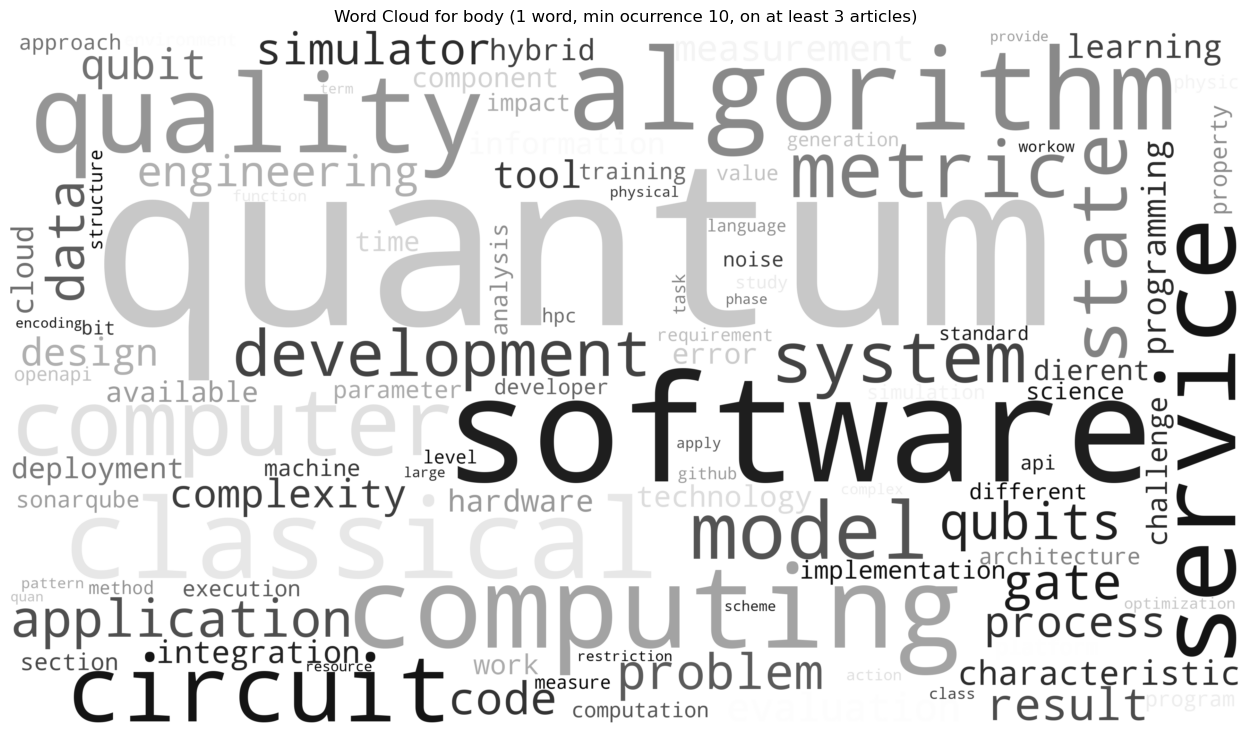

In [18]:
# Word cloud for single word title
scenario = (10, 1)
frequencies, frequencies_df, f_clean, clean_frequencies_df = create_data_frecuencies(*scenario, 3)
# display(clean_frequencies_df)
create_word_cloud(f_clean, 'Word Cloud for body (1 word, min ocurrence 10, on at least 3 articles)', *scenario)

In [6]:
search = 'service'
clean_frequencies_df[clean_frequencies_df[search] > 0][search]

Quantum Services Generation and Deployment Process- A Quality-Oriented Approach.pdf             49.0
Quantum service-oriented computing- current landscape and challenges.pdf                       196.0
An exploratory study on the challenges of engineering quantum applications in the cloud.pdf     40.0
4_Service engineering for quantum computing Ensuring highquality quantum services.pdf           88.0
Name: service, dtype: float64

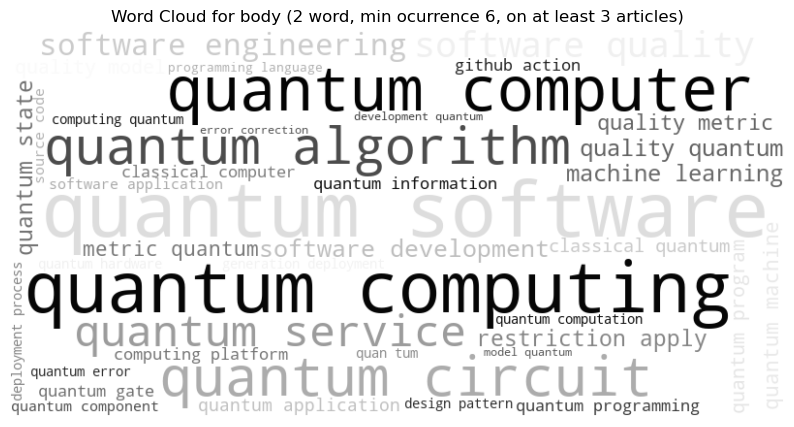

In [7]:
# Word cloud for single word title
scenario = (6, 2)
frequencies, frequencies_df, f_clean, clean_frequencies_df = create_data_frecuencies(*scenario, 3)
# display(clean_frequencies_df)
create_word_cloud(f_clean, 'Word Cloud for body (2 word, min ocurrence 6, on at least 3 articles)', *scenario)

In [8]:
search = 'quantum service'
clean_frequencies_df[clean_frequencies_df[search] > 0][search]

Quantum Services Generation and Deployment Process- A Quality-Oriented Approach.pdf      25.0
Quantum service-oriented computing- current landscape and challenges.pdf                 37.0
4_Service engineering for quantum computing Ensuring highquality quantum services.pdf    52.0
Name: quantum service, dtype: float64

In [9]:
search = 'quality metric'
clean_frequencies_df[clean_frequencies_df[search] > 0][search]

Quantum Services Generation and Deployment Process- A Quality-Oriented Approach.pdf                6.0
Addressing Temporal Variations in Qubit Quality Metrics for Parameterized Quantum Circuits.pdf    12.0
4_Service engineering for quantum computing Ensuring highquality quantum services.pdf             13.0
Name: quality metric, dtype: float64

In [10]:
search = 'metric quantum'
clean_frequencies_df[clean_frequencies_df[search] > 0][search]

Cruz-Lemus et al. - 2021 - Towards a Set of Metrics for Quantum Circuits Unde.pdf         7.0
Some Size and Structure Metrics for Quantum Software2021_Zhao_.pdf                       16.0
4_Service engineering for quantum computing Ensuring highquality quantum services.pdf     6.0
Name: metric quantum, dtype: float64

In [11]:
search = 'quality quantum'
clean_frequencies_df[clean_frequencies_df[search] > 0][search]

Quantum Services Generation and Deployment Process- A Quality-Oriented Approach.pdf       8.0
Math and physics tools for quality quantum programming.pdf                                9.0
Software quality issues in quantum information systems.pdf                                8.0
4_Service engineering for quantum computing Ensuring highquality quantum services.pdf    12.0
Name: quality quantum, dtype: float64

In [12]:
search = 'quality model'
clean_frequencies_df[clean_frequencies_df[search] > 0][search]

Research on Quality Model for Quantum Simulator Software.pdf                                        20.0
Studying efficacy of traditional software quality parameters in quantum software engineering.pdf     7.0
Name: quality model, dtype: float64

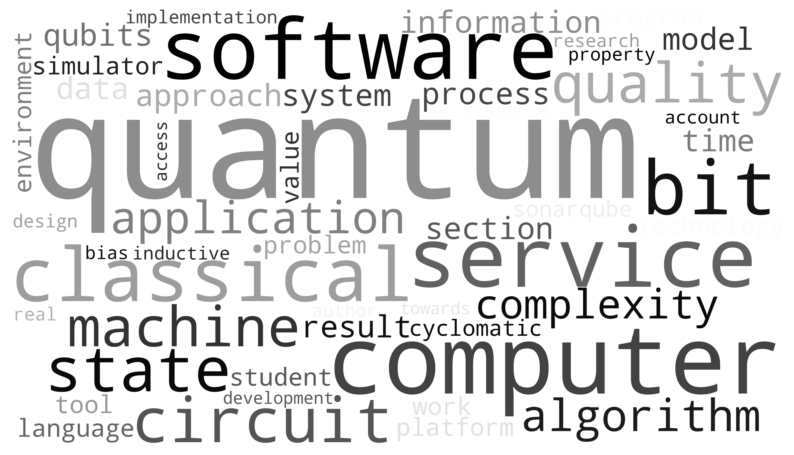

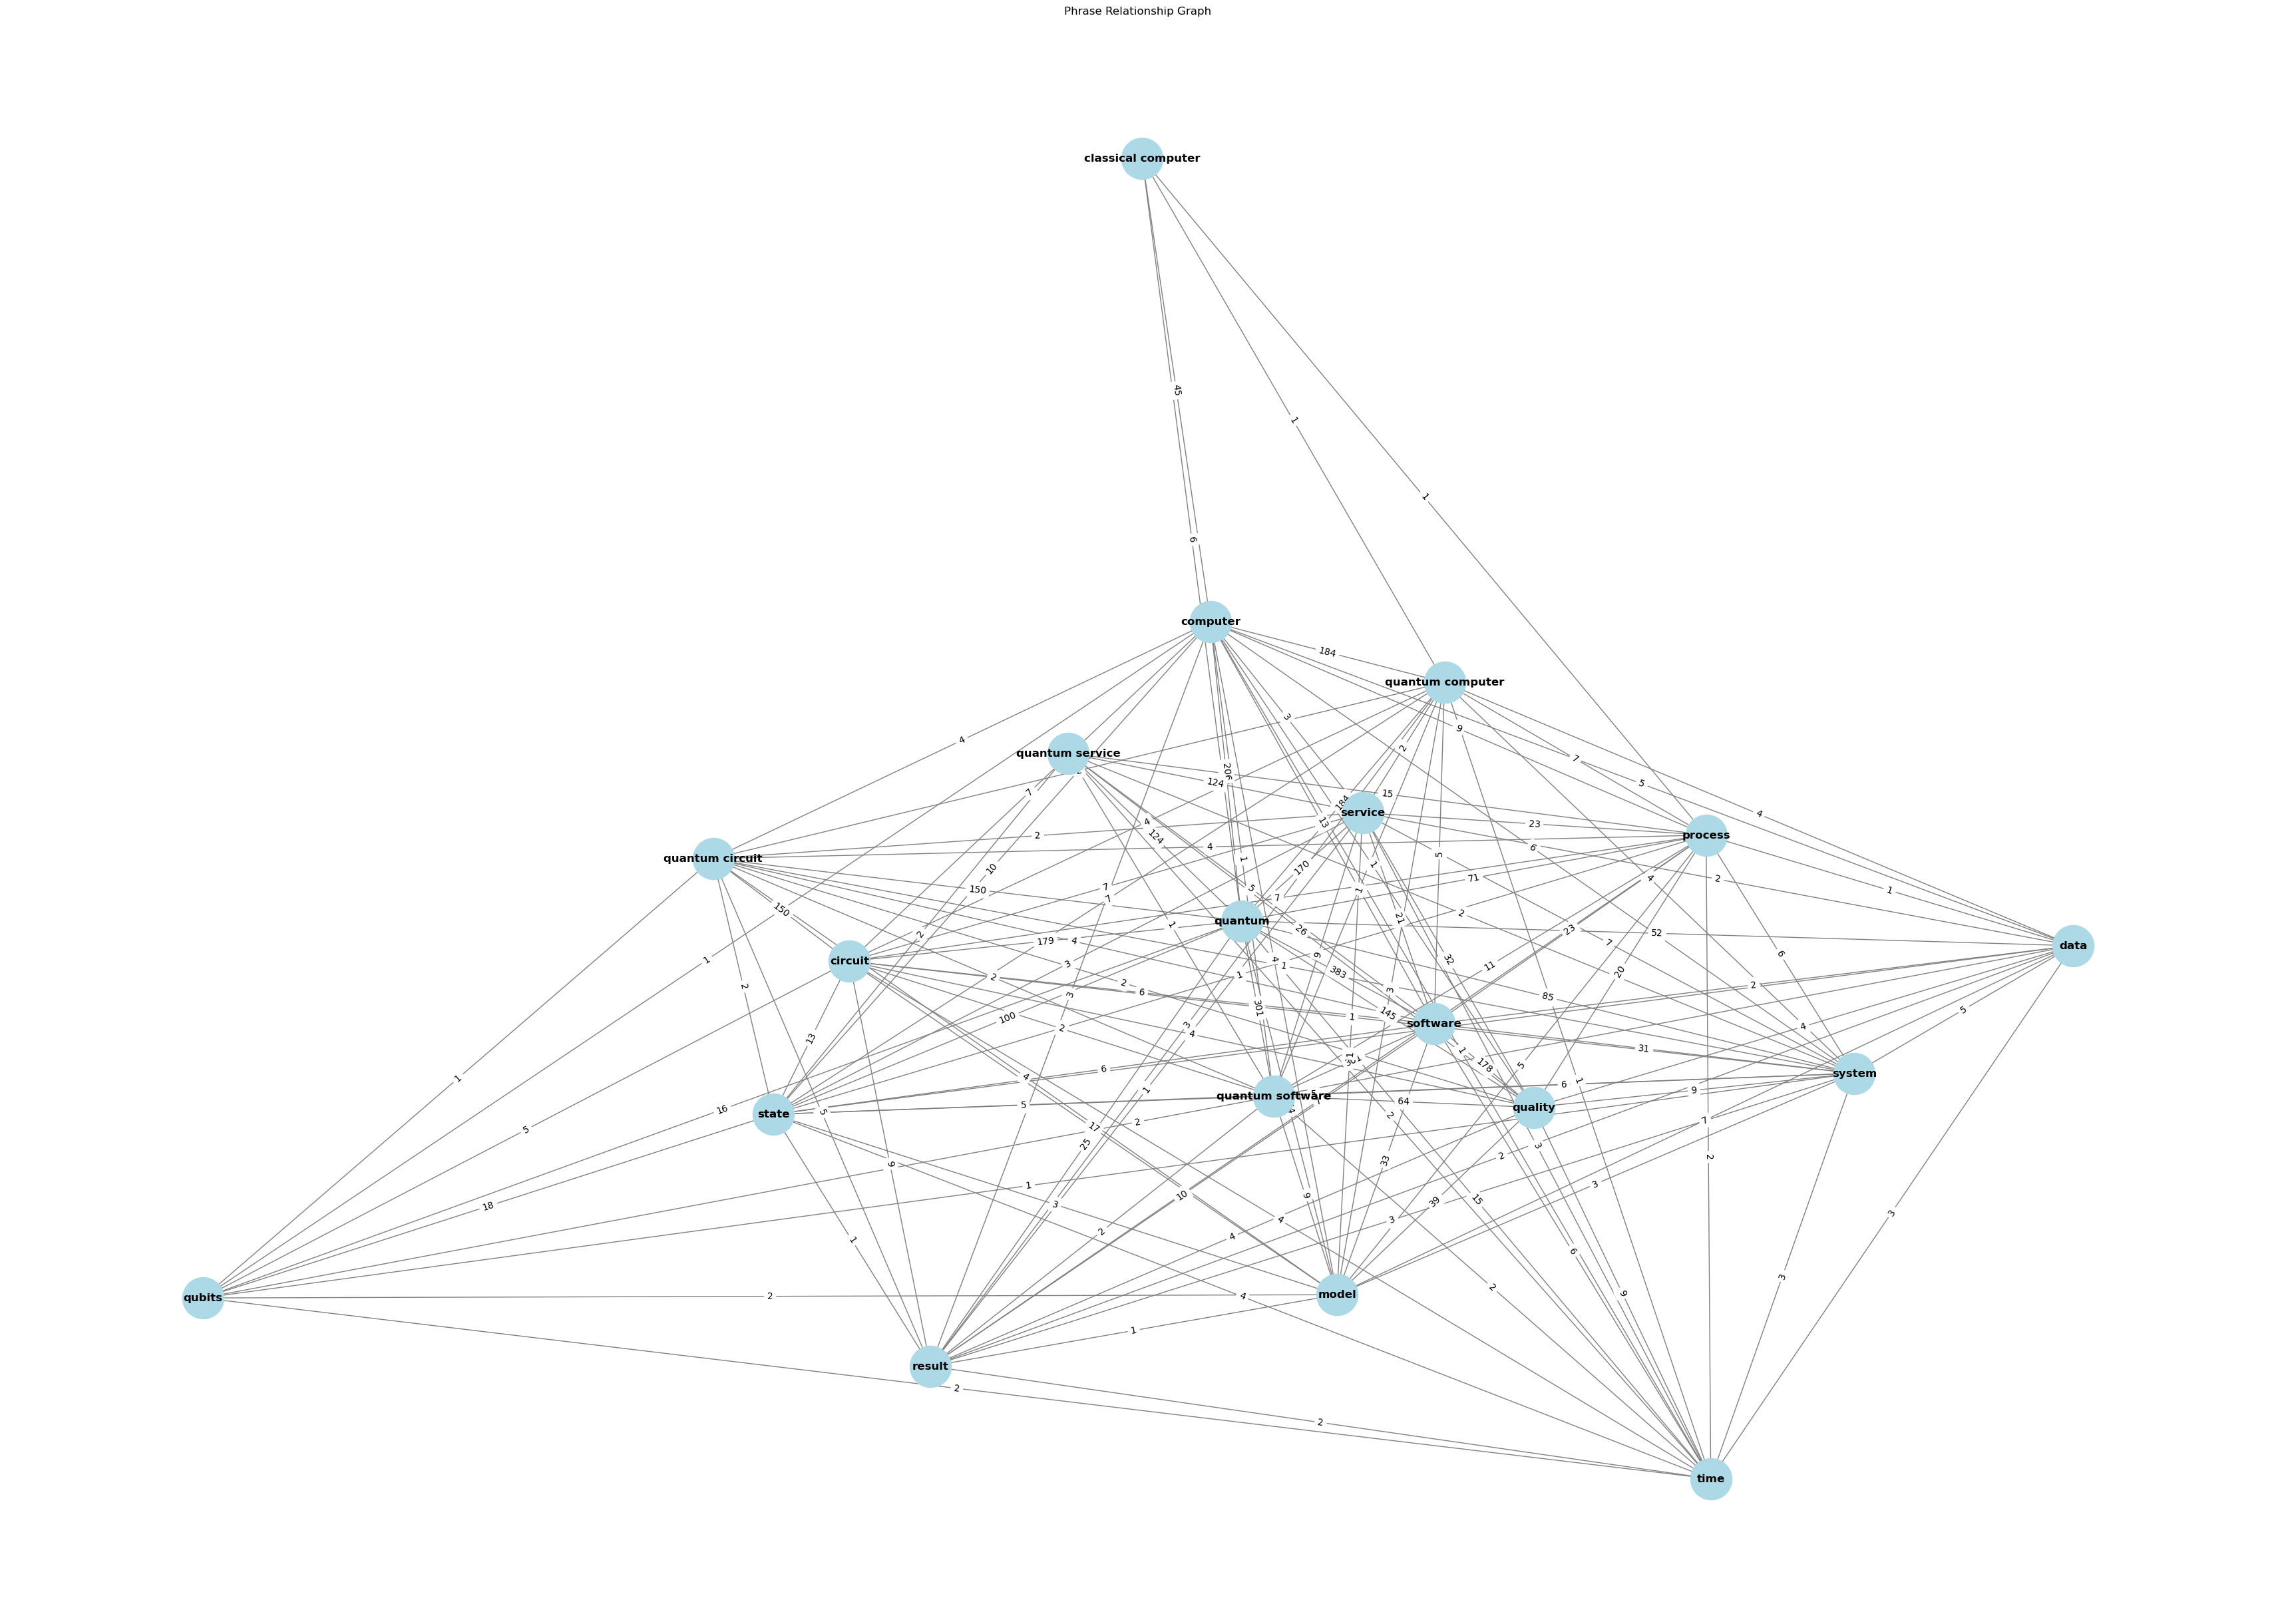

In [13]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.chunk import RegexpParser
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from itertools import combinations

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

def extract_phrases(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)

    grammar = r"""
        NP: {<DT>?<JJ>*<NN.*>+}  # Noun Phrase without Numbers
            {<JJ>*<NN.*><IN><NN.*>+}  # Noun Phrase with Preposition
            {<JJ>*<NN.*>}  # Noun Phrase without determiner
            {<NNP>+}  # Proper Nouns
            {<DT>?<JJ>*<NN.*>+<CC><JJ>*<NN.*>+}  # Noun Phrases joined by Conjunctions
    """
    
    chunker = RegexpParser(grammar)
    result = chunker.parse(tagged)
    
    phrases = []
    for subtree in result.subtrees():
        if subtree.label() == 'NP':
            phrases.append(' '.join(word for word, pos in subtree.leaves()))

    return phrases

def generate_graph(phrases, threshold=2):
    phrase_counter = Counter(phrases)
    common_phrases = [phrase for phrase, count in phrase_counter.items() if count >= threshold]
    generate_word_cloud(phrase_counter)
    
    G = nx.Graph()
    G.add_nodes_from(common_phrases)
    
    for phrase1, phrase2 in combinations(common_phrases, 2):
        weight = sum(1 for p in phrases if phrase1 in p and phrase2 in p)
        if weight > 0:
            G.add_edge(phrase1, phrase2, weight=weight)
    
    return G

def visualize_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(34, 24))
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', edge_color='gray', edge_cmap=plt.cm.Grays)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.savefig('relations.png', dpi=300, bbox_inches='tight')
    plt.title("Phrase Relationship Graph")
    plt.axis('off')
    plt.show()

def generate_word_cloud(phrase_counter):
    common_phrases = [phrase for phrase, count in phrase_counter.most_common(60)]
    
    wordcloud = WordCloud(width = 3840, height = 2160, background_color ='white', colormap = 'binary').generate(' '.join(common_phrases))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('relations-cloud.png', dpi=300, bbox_inches='tight')
    plt.show()

phrases = extract_phrases(' '.join(df['full_text']))
graph = generate_graph(phrases, threshold=15)
visualize_graph(graph)